In [ ]:
# https://tensorflow.org/install
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 68kB/s 
     |████████████████████████████████| 419kB 39.7MB/s 
     |████████████████████████████████| 3.0MB 40.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

'image recognition.ipynb'   train1.zip	 train.zip


In [ ]:
train_file = "/content/drive/My Drive/Colab Notebooks/train1.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [ ]:
import os
train_path = './train1/'
image_files = os.listdir(train_path)
image_files

['Earth_5.jpg',
 'Mars_1.jpeg',
 'Earth_4.jpg',
 'Earth_2.jpeg',
 'Mars_3.jpeg',
 'Earth_1.jpg',
 'Mars_2.jpg',
 'Mars_4.jpeg',
 'Earth_3.jpg',
 'Mars_5.jpg']

In [ ]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "Earth" in file_name else 0

train_path = "./train1/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]
for i in image_files:
  print(train_images,'Whose label is: ',train_labels)

[array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [ ]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

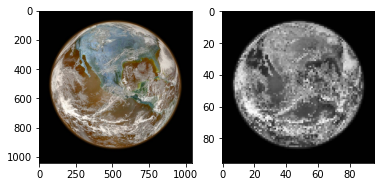

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
preview_index = 0
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [ ]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [ ]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(10, 96, 96, 1) (10,)


In [ ]:

import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=5, batch_size=50)
model.save_weights("model.tf")

Tensorflow: 2.3.0
Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 0.6937 - sparse_categorical_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 0.6528 - sparse_categorical_accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 0.5789 - sparse_categorical_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 0.4584 - sparse_categorical_accuracy: 0.7000
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 0.5054 - sparse_categorical_accuracy: 0.6000


In [ ]:
from google.colab import files
uploads = files.upload()

Saving Earth_19.jpg to Earth_19.jpg
Saving Earth_23.jpg to Earth_23.jpg
Saving Earth_52.jpg to Earth_52.jpg
Saving Mars_04.jpg to Mars_04.jpg
Saving Mars_06.jpg to Mars_06.jpg
Saving Mars_08.jpg to Mars_08.jpg


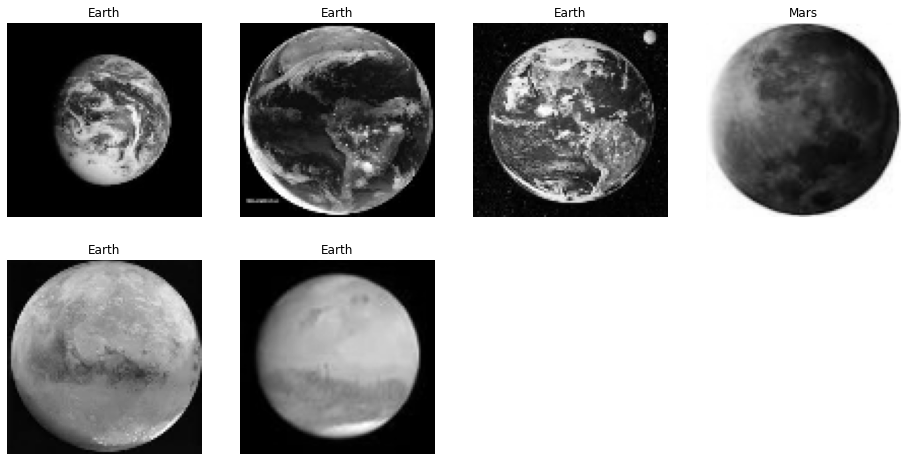

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("Earth" if np.argmax(eval_predictions[i])==1 else "Mars")
    plt.axis('off')